# Practical Assignment:
	 	Build a CNN model using TensorFlow for image classification on the CIFAR-10 dataset. Preprocess the dataset, design the CNN architecture, train the model using backpropagation, and evaluate its performance using accuracy metrics. 

Load and Preprocess CIFAR-10 Dataset

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical

# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train,x_test = x_train / 255.0, x_test / 255.0


# One hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 225s 1us/step


Design the CNN Architecture

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3,3), activation='relu'),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

Compile the Model

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Train the Model (Backpropagation is handled automatically)

In [25]:

history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 59ms/step - accuracy: 0.2958 - loss: 1.8909 - val_accuracy: 0.4907 - val_loss: 1.3795
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.5068 - loss: 1.3686 - val_accuracy: 0.5796 - val_loss: 1.1832
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.5803 - loss: 1.1856 - val_accuracy: 0.6360 - val_loss: 1.0327
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.6274 - loss: 1.0642 - val_accuracy: 0.6708 - val_loss: 0.9382
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.6588 - loss: 0.9688 - val_accuracy: 0.6905 - val_loss: 0.8883
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.6898 - loss: 0.8971 - val_accuracy: 0.6875 - val_loss: 0.9007
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.7100 - loss: 0.8427 - val_accuracy: 0.6968 - val_loss: 0.8729
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.7246 - loss: 0.7990 - 

Evaluate Model Performance

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7313 - loss: 0.8721
Test accuracy: 72.48%


Visualize Training performance

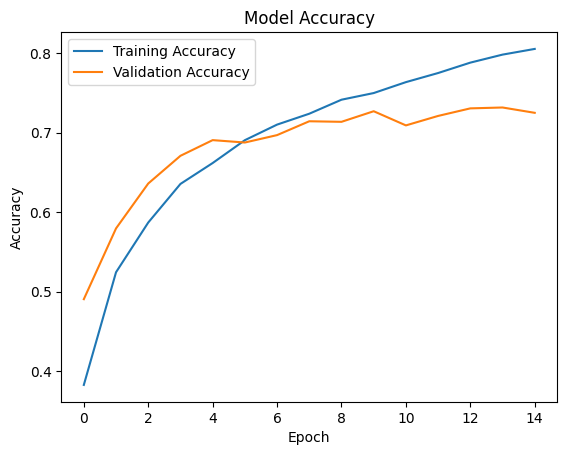

In [27]:
# Visualize Training performance
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()